# Project: Stock Price Prediction with LSTM
1. Understanding Financial Data
Introduction to financial time series: stock prices, volume, etc.

Why predict prices? To identify trends, volatility, and support decision-making.

2. Data Preparation
Extracting the closing price as the main feature.

Normalizing data: a crucial step for effective neural network training.

Creating time sequences (sliding windows) to help the model learn temporal dependencies.

3. Introduction to LSTM
Why use an LSTM for time series?

How an LSTM cell works: memory and forget mechanisms.

How LSTM processes sequential data.

4. Building a Simple Model
Basic architecture: LSTM layers followed by a Dense layer.

Choice of loss function (MSE) and optimizer (Adam).

Training the model on prepared data.

5. Evaluating and Interpreting Results
Comparing real vs. predicted prices.

Computing performance metrics: MSE, MAE, etc.

Visualizing the predictions.

6. Improvements and Experiments
Adding additional features (volume, technical indicators, etc.)

Exploring more complex architectures (bidirectional LSTM, CNN-LSTM, etc.)

Testing model robustness on different financial assets.



# Fetching SP&500 Data

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd


/var/folders/ws/9s7wjqf52rvfgmh5kr52jm9w0000gn/T/ipykernel_22395/2257545327.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^GSPC", start="2007-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2007-01-03  1416.599976  1429.420044  1407.859985  1418.030029  3429160000
2007-01-04  1418.339966  1421.839966  1408.430054  1416.599976  3004460000
2007-01-05  1409.709961  1418.339966  1405.750000  1418.339966  2919400000
2007-01-08  1412.839966  1414.979980  1403.969971  1409.260010  2763340000
2007-01-09  1412.109985  1415.609985  1405.420044  1412.839966  3038380000


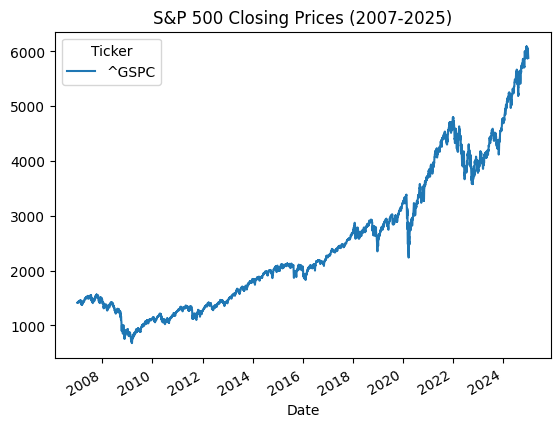

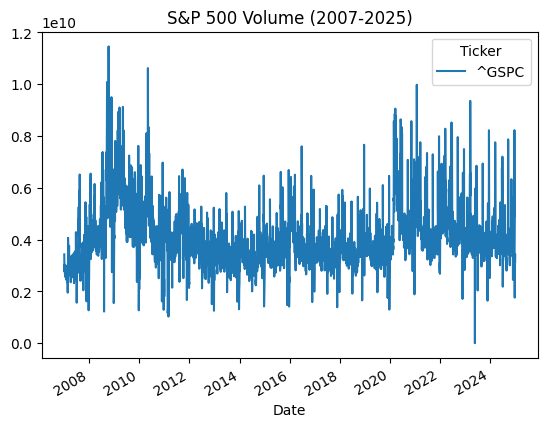

In [12]:
# S&P 500 ticker symbol is "^GSPC"
# Fetch financial data using yfinance
data = yf.download("^GSPC", start="2007-01-01", end="2025-01-01")
print(data.head())

# Plot closing prices and volume
data['Close'].plot(title="S&P 500 Closing Prices (2007-2025)")
plt.show()

data['Volume'].plot(title="S&P 500 Volume (2007-2025)")
plt.show()

# Normalizing Financial Data
Neural networks work best when data is scaled within a limited range (usually between 0 and 1 or -1 and 1).

This is done by applying min-max normalization:

=> X = (X - Xmin) / (Xmax - Xmin)

In [13]:
close_prices = data["Close"].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
close_prices_scaled = scaler.fit_transform(close_prices)
print(close_prices_scaled)

[[0.13670216]
 [0.13702356]
 [0.13542947]
 ...
 [0.97793943]
 [0.96613615]
 [0.961461  ]]


# Time Sequences

In [14]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 60 
X, y = create_sequences(close_prices_scaled, SEQ_LENGTH)

print(f"X shape: {X.shape}")  
print(f"y shape: {y.shape}")  

X shape: (4470, 60, 1)
y shape: (4470, 1)


# LSTM (long short term memory)



In [15]:
# X must have the shape (samples, seq_length, features)
print(f"Shape of X: {X.shape}")  # e.g., (number_of_examples, 60, 1)

# 3. Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X.shape[1], X.shape[2])))
# 50 LSTM units, return_sequences=False because we want only the final output
model.add(Dense(1))  # final dense layer to predict a single price value

# 4. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Shape of X: (4470, 60, 1)
Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0105 - val_loss: 4.7602e-04
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.5475e-05 - val_loss: 3.7592e-04
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.1279e-05 - val_loss: 3.5157e-04
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.4246e-05 - val_loss: 3.6474e-04
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.8819e-05 - val_loss: 3.8288e-04
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.4274e-05 - val_loss: 3.1508e-04
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.4099e-05 - val_loss: 3.1933e-04
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.1026e-05 - val_loss: 2.9101e-04
Epoch 9/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.4390e-05 - val_loss: 3.8117e-04
Epoch 10/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.9242e-05 - val_loss: 2.6313e-04
Epoch 11/20
112/112 ━━━━━━━━━━━━━━━━━

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.7915e-05 - val_loss: 1.7168e-04
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9971e-05 - val_loss: 2.5048e-04
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4936e-05 - val_loss: 1.6743e-04
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.4899e-05 - val_loss: 2.4681e-04
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.0443e-05 - val_loss: 1.6221e-04
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3045e-05 - val_loss: 1.7263e-04
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.6295e-05 - val_loss: 1.7468e-04
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3108e-05 - val_loss: 1.4916e-04
Epoch 9/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.4147e-05 - val_loss: 1.9210e-04
Epoch 10/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9676e-05 - val_loss: 1.4401e-04
Epoch 11/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss

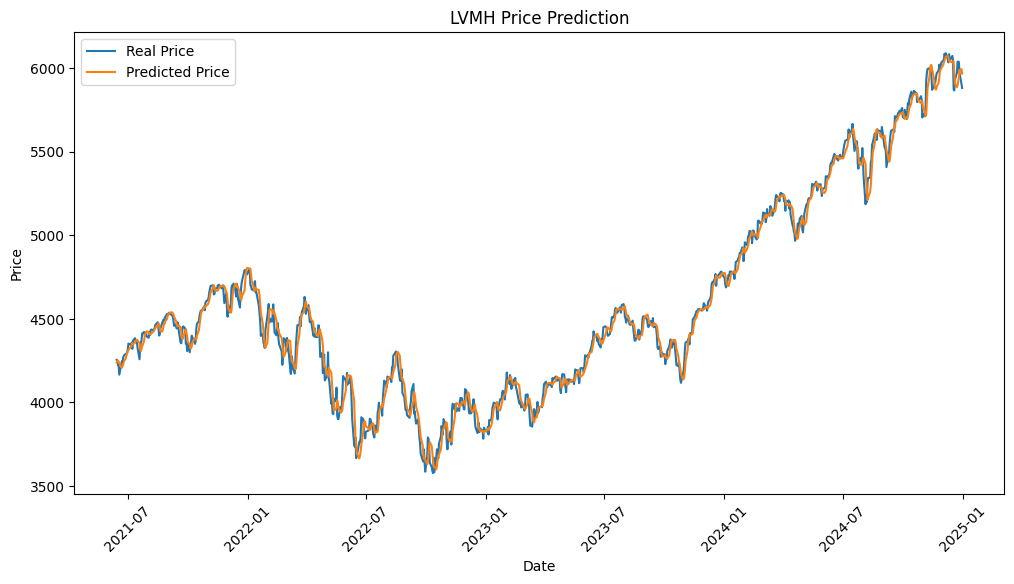

In [16]:
# Train/test split: 80% training data, 20% testing data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the model with validation on the test set
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set (scaled predictions)
y_pred_scaled = model.predict(X_test)

# Inverse transform to get original price scale
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_real = scaler.inverse_transform(y_test)

# Prepare corresponding dates for the test set
dates = data.index.values
dates_test = dates[len(dates) - len(y_test):]

# Plot real vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test_real, label='Real Price')
plt.plot(dates_test, y_pred, label='Predicted Price')
plt.title("LVMH Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [17]:
# y_test_real and y_pred are the true values and predictions in the original scale
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred))
mae = mean_absolute_error(y_test_real, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Root Mean Squared Error (RMSE): 58.7219
Mean Absolute Error (MAE): 45.4871


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

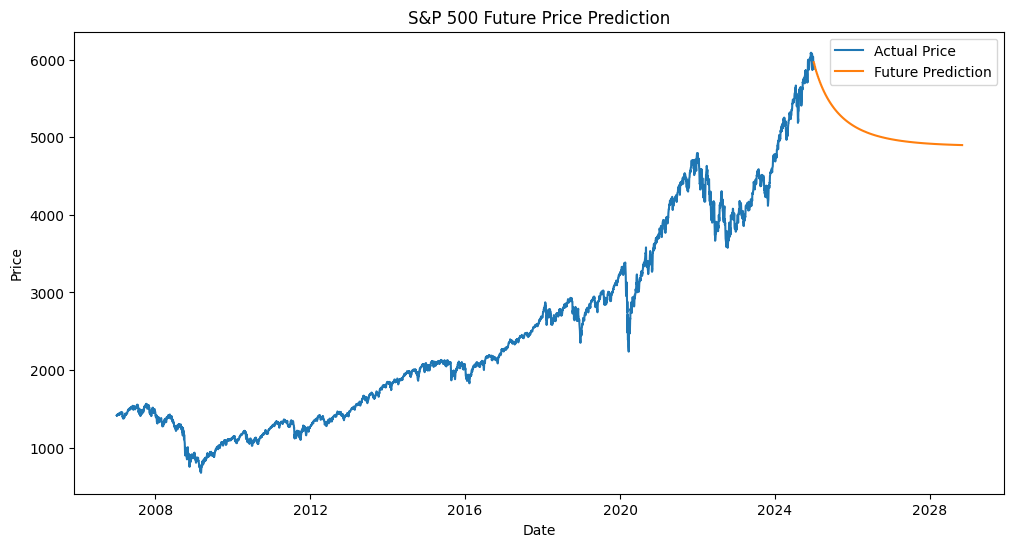

In [22]:
# Take the last sequence from the test set as the starting point
last_sequence = X_test[-1]

def predict_future_days(model, last_seq, n_days):
    """
    Predict future stock prices for n_days using the trained model
    by iteratively feeding predictions back as inputs.
    """
    preds = []
    current_seq = last_seq.copy()

    for _ in range(n_days):
        # Predict the next value based on the current sequence
        pred = model.predict(current_seq.reshape(1, current_seq.shape[0], 1))
        preds.append(pred[0,0])
        # Update the sequence by removing the oldest value and appending the prediction
        current_seq = np.append(current_seq[1:], pred[0,0])
    return np.array(preds)

n_days_to_predict = 1000
# Predict scaled future prices
future_preds_scaled = predict_future_days(model, last_sequence, n_days_to_predict)

# Inverse transform to original price scale
future_preds = scaler.inverse_transform(future_preds_scaled.reshape(-1,1))

# Generate future dates (business days)
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_days_to_predict, freq='B')

# Plot historical and future predicted prices
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label="Actual Price")
plt.plot(future_dates, future_preds, label="Future Prediction")
plt.title("S&P 500 Future Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
